In [2]:
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from pygame import mixer

pygame 2.1.0 (SDL 2.0.16, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [6]:
model = load_model(r'C:\Users\User\modelDr.h5')

In [7]:
mixer.init()
sound= mixer.Sound('alarm.wav')
cap = cv2.VideoCapture(0)
Score = 0
while True:
    ret, frame = cap.read()
    height,width = frame.shape[0:2]
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces= face_cascade.detectMultiScale(gray, scaleFactor= 1.2, minNeighbors=3)
    eyes= eye_cascade.detectMultiScale(gray, scaleFactor= 1.1, minNeighbors=1)
    
    cv2.rectangle(frame, (0,height-50),(200,height),(0,0,0),thickness=cv2.FILLED)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,pt1=(x,y),pt2=(x+w,y+h), color= (0,255,0), thickness=3 )
        
    for (ex,ey,ew,eh) in eyes:
        #cv2.rectangle(frame,pt1=(ex,ey),pt2=(ex+ew,ey+eh), color= (0,255,0), thickness=3 )
        
        # preprocessing steps
        eye= frame[ey:ey+eh,ex:ex+w]
        eye= cv2.resize(eye,(80,80))
        eye= eye/255
        eye= eye.reshape(80,80,3)
        eye= np.expand_dims(eye,axis=0)
        # preprocessing is done now model prediction
        prediction = model.predict(eye)
        
        # if eyes are closed
        if prediction[0][0]>0.30:
            cv2.putText(frame,'closed',(10,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)
            cv2.putText(frame,'Score'+str(Score),(100,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)
            Score=Score+1
            if(Score>15):
                try:
                    sound.play()
                except:
                    pass
            
        # if eyes are open
        elif prediction[0][1]>0.90:
            cv2.putText(frame,'open',(10,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)      
            cv2.putText(frame,'Score'+str(Score),(100,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)
            Score = Score-1
            if (Score<0):
                Score=0
            
        
    cv2.imshow('frame',frame)
    if cv2.waitKey(33) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [15]:
from tensorflow.keras.preprocessing import image
import os
open_eye_path_test=os.listdir(r'C:\Users\User\mrlDataset\test\open_test')[5]

In [17]:
print(open_eye_path_test)

s0001_01847_0_0_1_0_0_01.png


In [20]:
image_shape = (80,80,3)
my_image = image.load_img(r'C:\Users\User\mrlDataset\test\open_test\s0001_01847_0_0_1_0_0_01.png',target_size=image_shape)

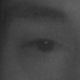

In [21]:
my_image

In [23]:
my_image = image.img_to_array(my_image)
my_image = np.expand_dims(my_image, axis=0)

In [24]:
model.predict(my_image)

array([[0., 1.]], dtype=float32)

NameError: name 'train_data' is not defined